Linear Regression Model at Python 

In [27]:
import pandas as pd

In [28]:
# Baca dataset kunjungan_dokter_gigi_kota_x_dqlab.tsv 
df_kunjungan = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/kunjungan_dokter_gigi_kota_x_dqlab.tsv", sep="\t")
# Cetak ukuran dataset 
print("Ukuran df_kunjungan:", df_kunjungan.shape)

print(df_kunjungan.head())


Ukuran df_kunjungan: (24, 3)
   Bulan  Tahun  tingkat kunjungan ke dokter gigi
0      1   1996                                37
1      2   1996                                32
2      3   1996                                56
3      4   1996                                43
4      5   1996                                52


In [29]:
# Baca dataset tingkat_penjualan_kota_x_dqlab.tsv 
df_penjualan = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/tingkat_penjualan_kota_x_dqlab.tsv", sep="\t")

print("\n\nUkuran df_penjualan:", df_penjualan.shape)

print(df_penjualan.head())



Ukuran df_penjualan: (24, 6)
   No  Bulan  Tahun  penjualan permen  penjualan sereal  penjualan buah pisang
0   1      1   1996            200661             10324                 112146
1   2      2   1996            297141             13150                 175417
2   3      3   1996            235586              5398                 104645
3   4      4   1996            299498              7609                 112283
4   5      5   1996            395824              5190                 137083


Gabungin kolom Tahun dan Bulan terlebih dahulu sehingga butirnya datanya akan memiliki format YYYY-MM menjadi kolom baru dengan nama Periode. Setelah itu, kedua data frame df_kunjungan dan df_penjualan dapat digabung dengan mengacu pada kolom Periode di kedua data frame ini"

In [30]:
# Gabungkan kolom Tahun dan Bulan menjadi kolom Periode dengan isi tiap barisnya memiliki format YYYY-MM 
str_bulan = lambda x: "0"+str(x) if x<10 else str(x)
df_kunjungan["Periode"] = df_kunjungan["Tahun"].map(str) + "-" + df_kunjungan["Bulan"].map(str_bulan)
df_penjualan["Periode"] = df_penjualan["Tahun"].map(str) + "-" + df_penjualan["Bulan"].map(str_bulan)

# Drop kolom Tahun, Bulan dari df_kunjungan
df_kunjungan.drop(columns=["Tahun", "Bulan"], inplace=True)

# Drop kolom Tahun, Bulan dan No dari df_penjualan
df_penjualan.drop(columns=["Tahun", "Bulan", "No"], inplace=True)

# Inspeksi nama-nama kolom di kedua dataframe
print("Nama kolom df_kunjungan:", df_kunjungan.columns)
print("\nNama kolom df_penjualan", df_penjualan.columns)

Nama kolom df_kunjungan: Index(['tingkat kunjungan ke dokter gigi', 'Periode'], dtype='object')

Nama kolom df_penjualan Index(['penjualan permen', 'penjualan sereal', 'penjualan buah pisang',
       'Periode'],
      dtype='object')


In [31]:
# Set index kolom Periode
df_kunjungan.set_index("Periode", inplace=True)
df_penjualan.set_index("Periode", inplace=True)

# Gabungkan kedua dataframe dengan Periode yang telah menjadi key column nya
df = df_kunjungan.join(df_penjualan)
print("Ukuran df:", df.shape)
print(df.head())

Ukuran df: (24, 4)
         tingkat kunjungan ke dokter gigi  penjualan permen  penjualan sereal  \
Periode                                                                         
1996-01                                37            200661             10324   
1996-02                                32            297141             13150   
1996-03                                56            235586              5398   
1996-04                                43            299498              7609   
1996-05                                52            395824              5190   

         penjualan buah pisang  
Periode                         
1996-01                 112146  
1996-02                 175417  
1996-03                 104645  
1996-04                 112283  
1996-05                 137083  


Visualisasi: Korelasi Penjualan Makanan dengan Kunjungan ke Dokter Gigi

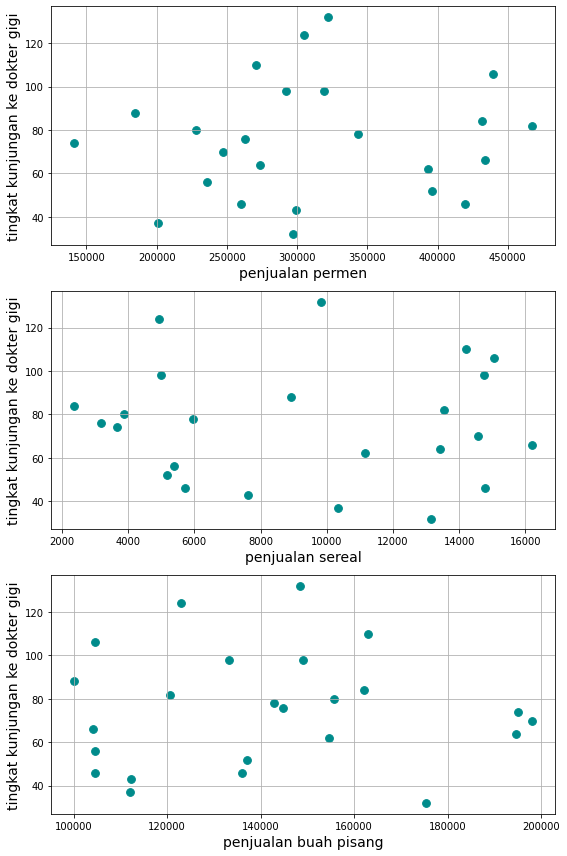

In [32]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
# Kolom x adalah kolom dengan awalan penjualan
x_cols = df.columns[1:]
# Kolom y merupakan kolom tingkat kunjungan ke dokter gigi
y_col = "tingkat kunjungan ke dokter gigi"


# Visualisasi 
fig, axs = plt.subplots(len(x_cols), 1, figsize=(8,12))
for ax, x_col in zip(axs, x_cols):
    # Plotkan dengan scatter
    df.plot.scatter(x=x_col, y=y_col, c="darkcyan", s=60, ax=ax)
    ax.set_xlabel(x_col, fontsize=14)
    ax.set_ylabel(y_col, fontsize=14)
    ax.grid()
plt.tight_layout()
plt.show()


Koefisien korelasi Pearson (Pearson correlation coefficient) digunakan untuk mengukur linieritas dua variabel.

Koefisien korelasi Pearson ini memiliki nilai -1 sampai 1. Nilai kolerasi menunjukkan linieritas sempurna untuk kemiringan (slope) positif. Sedangkan  menunjukkan linieritas yang sempurna juga tetapi untuk kemiringan (slope) negatif. Sementara itu,  justru tidak menunjukkan hubungan sama sekali. 

-----

Koefisien Korelasi Pearson: Korelasi Penjualan Makanan dengan Kunjungan ke Dokter Gigi

In [33]:
print("Koefisien korelasi Pearson:")
print("---------------------------")
print(df.corr()["tingkat kunjungan ke dokter gigi"])


Koefisien korelasi Pearson:
---------------------------
tingkat kunjungan ke dokter gigi    1.000000
penjualan permen                    0.083333
penjualan sereal                   -0.027465
penjualan buah pisang               0.028650
Name: tingkat kunjungan ke dokter gigi, dtype: float64


### The Delayed Effect

Menggunakan method stats.pearsonr dari scipy untuk perhitungan koefisien korelasi Pearson akibat adanya efek keterlambatan ini.
Method ini akan mengembalikan dua output, yaitu koefisien korelasi Pearson dan p-value

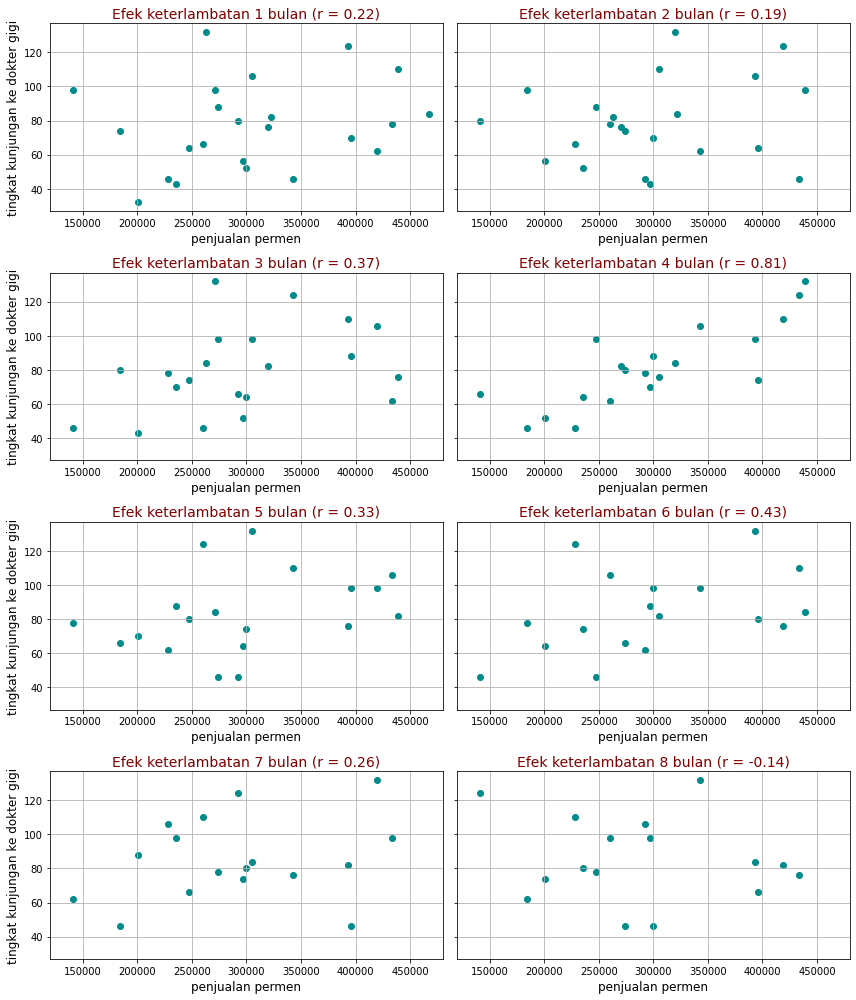

In [34]:
import matplotlib.pyplot as plt
from scipy import stats

# Spesifikasi keterlambatan hingga 8 bulan
n_delays = 8
# Spesifikasi jumlah kolom untuk subplots
n_plt_cols = 2
fig, axs = plt.subplots(round(n_delays/2), n_plt_cols, figsize=(12, 3.5*round(n_delays/2)), sharey=True)
for i in range(n_delays):
    # variabel bebas: penjualan permen
    x = df["penjualan permen"][:-(i+1)]
    # variabel bergantung: tingkat kunjungan ke dokter gigi dan implementasikan keterlambatan
    y = df["tingkat kunjungan ke dokter gigi"][i+1:]
    # Hitung koefisien korelasi Pearson
    pearson_r, p_value = stats.pearsonr(x, y) 
    # koefisien korelasi Pearson yang telah dihitung
    title = "Efek keterlambatan %d bulan (r = %.2f)" % (i+1, pearson_r)
    
    #  scatter plot
    ax = axs[i // n_plt_cols][i % n_plt_cols]
    ax.scatter(x, y, c="darkcyan")
    ax.set_title(title, fontsize=14, color="maroon")
    if i % n_plt_cols == 0:
        ax.set_ylabel("tingkat kunjungan ke dokter gigi", fontsize=12)
    ax.set_xlabel("penjualan permen", fontsize=12)
    ax.set_xlim([120000, 480000])
    ax.grid()

plt.tight_layout()
plt.show()


 Eureka Moment: Keterlambatan 4 bulan memberikan hubungan linieritas antara penjualan permen dan tingkat kunjungan ke dokter gigi yang ditunjukkan dengan nilai koefisien korelasi sebesar 0.81.

---------------------------------------------------------------------

Menentukan Persamaan Linier

In [35]:
import numpy as np

x = df["penjualan permen"][:-4].to_numpy()
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy()

# nilai rata-rata variabel bebas dan bergantung
x_mean = x.mean()
y_mean = y.mean()

# nilai pembilang dan penyebut untuk m
m_pembilang = ((x - x_mean) * (y - y_mean)).sum()
m_penyebut = ((x - x_mean)**2).sum()

# nilai koefisien regresi linier
m = m_pembilang / m_penyebut
b = y_mean - m * x_mean
print("Persamaan regresi linier: y = %.4e * x + %.4f" % (m, b))

Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341


-----

Prediksi Tingkat Kunjungan

In [36]:
# variabel bebas yang belum digunakan
x_new = df["penjualan permen"][-4:].to_numpy()
#  x_new ke dalam persamaan regresi
y_pred = m * x_new + b
print("Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:")
for i, kunjungan in enumerate(y_pred):
    print("1998-0%d: %4d kunjungan." % (i+1, round(kunjungan)))


Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:
1998-01:   73 kunjungan.
1998-02:   87 kunjungan.
1998-03:  121 kunjungan.
1998-04:  112 kunjungan.


-----

Opsi library untuk regresi linier:

1. Regresi Linier dengan numpy.polyfit.

2. Regresi Linier dengan scipy.stats.linregress

3. Regresi Linier dengan Scikit-Learn
-----


In [37]:
# Implementasi prediksi tingkat kunjungan dengan menggunakan scikit-learn
from sklearn.linear_model import LinearRegression

# variabel bebas dan bergantung untuk keterlambatan 4 bulan
# dan diubah menjadi numpy 2d narray melalui .reshape((-1,1))
x = df["penjualan permen"][:-4].to_numpy().reshape((-1,1))
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy().reshape((-1,1))

lr = LinearRegression()

lr.fit(x,y)

# data variabel bebas yang belum digunakan
# ubahlah menjadi numpy 2d narray melalui .reshape((-1,1))
x_new = df["penjualan permen"][-4:].to_numpy().reshape((-1,1))
# Prediksilah x_new dengan method predict
y_pred = lr.predict(x_new)

print("Persamaan regresi linier: y = %.4e * x + %.4f\n" % (lr.coef_, lr.intercept_))
print("Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:")
for i, kunjungan in enumerate(y_pred):
    print("1998-0%d: %4d kunjungan." % (i+1, round(kunjungan[0])))


Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341

Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:
1998-01:   73 kunjungan.
1998-02:   87 kunjungan.
1998-03:  121 kunjungan.
1998-04:  112 kunjungan.


-----

In [38]:
# Importlah numpy sebagai np dan stats dari scipy
import numpy as np
from scipy import stats

# Ambillah variabel bebas dan bergantung untuk keterlambatan 4 bulan
# dan ubahlah menjadi numpy 1d narray
x = df["penjualan permen"][:-4].to_numpy()
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy()

# Penggunaan numpy.polyfit
print("Penggunaan numpy.polyfit:")
np_out = np.polyfit(x, y, 1)
print("  Persamaan regresi linier: y = %.4e * x + %.4f\n" % (np_out[0], np_out[1]))

# Penggunaan stats.linregress
print("Penggunaan stats.linregress dari scipy:")
sclr_out = stats.linregress(x, y)
print("  Persamaan regresi linier: y = %.4e * x + %.4f\n" % (sclr_out.slope, sclr_out.intercept))

# Gunakan salah satu nilai saja dari np_out atau sclr_out
# untuk koefisien regresi liniernya (gunakan sclr_out)

# Ambillah butir data variabel bebas yang belum digunakan
x_new = df["penjualan permen"][-4:].to_numpy()
#  Gunakan x_new ke dalam persamaan regresi linier
y_pred = sclr_out.slope * x_new + sclr_out.intercept
print("Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:")
for i, kunjungan in enumerate(y_pred):
    print("1998-0%d: %4d kunjungan." % (i+1, round(kunjungan)))


Penggunaan numpy.polyfit:
  Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341

Penggunaan stats.linregress dari scipy:
  Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341

Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:
1998-01:   73 kunjungan.
1998-02:   87 kunjungan.
1998-03:  121 kunjungan.
1998-04:  112 kunjungan.
